* **Name: Magnus Aghe** 
* **Student ID: 900400010** 
* **Email: m.aghe0010@student.nu.edu** 
* **Course: ANA680 - MODULE 3 - WINE QUALITY PREDICTION - ASSIGNMENT**

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore")

In [3]:
!pip install --upgrade scikit-learn

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [5]:
# Loading the dataset

df=pd.read_csv("winequality-red.csv", delimiter=';')

In [6]:
df.shape

(1599, 12)

The dataset has 1599 rows and 12 columns

In [7]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [9]:
# Listing the column names

df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
df = df.rename (columns = {'fixed acidity' : 'fixed_acidity', 'volatile acidity' : 'volatile_acidity', 
                           'citric acid' : 'citric_acid', 'residual sugar' : 'residual_sugar', 
                           'free sulfur dioxide' : 'free_sulfur_dioxide', 'total sulfur dioxide' : 'total_sulfur_dioxide'})

In [11]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [13]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


There is no missing value in the dataset.

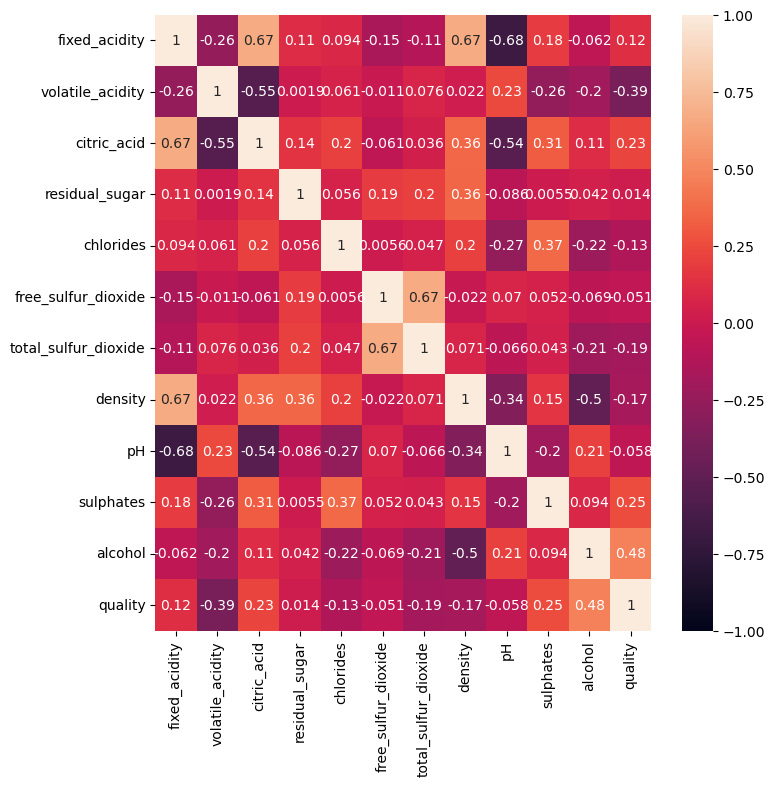

In [14]:
# Using correlation matrix and heatmap for feature selection

corr=df.corr()
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
plt.show()

In [15]:
winequality_corr = df.corr()
print(winequality_corr['quality'].sort_values(ascending=False)) 

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64


We shall be using as our predictors, the four features that have the most correlation with quality. They are alcohol, volatile_acidity, sulphates, and citric_acid.

volatile_acidity is quite strongly negatively correlated with wine quality.

In [16]:
# Converting 'quality' to categorical 

df['quality'] = df['quality'].astype('category')

In [17]:
# Number of values in the "quality" categorical feature

df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [18]:
# Summing up the count size of 'quality'

df['quality'].value_counts().sum()

1599

We shall group wine quality into three classes:- Poor (3 & 4), Good (5 & 6 ), Excellent (7 & 8)

In [19]:
# Let's map the quality categorical values to its actual meaning 
df['quality'] = df['quality'].map({3:'Poor', 4:'Poor', 5:'Good', 6:'Good', 7:'Excellent', 8:'Excellent'})
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Good
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Good
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Good
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Good
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,Good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,Good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,Good


In [20]:
# Number of values in the "quality" categorical feature

df['quality'].value_counts()

Good         1319
Excellent     217
Poor           63
Name: quality, dtype: int64

**Building the Classification Models**

In [21]:
# Selecting predictor and target variables

X = df[['alcohol', 'volatile_acidity', 'sulphates', 'citric_acid']]
Y = df['quality']

In [22]:
# Splitting the dataset such that the test data size is 25% of the total dataset


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=7)

**Model 1 - Logistic Regression**

In [23]:
# Training the model and predicting on test data

logreg = LogisticRegression()
logreg.fit(X_train, y_train.ravel()) # ravel to flatten data
y_pred = logreg.predict(X_test)

print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, target_names=['Good','Excellent','Poor']))

Logistic Regression
Accuracy: 0.8325
Confusion Matrix:
[[ 14  37   0]
 [ 11 319   0]
 [  0  19   0]]

              precision    recall  f1-score   support

        Good       0.56      0.27      0.37        51
   Excellent       0.85      0.97      0.90       330
        Poor       0.00      0.00      0.00        19

    accuracy                           0.83       400
   macro avg       0.47      0.41      0.42       400
weighted avg       0.77      0.83      0.79       400



**Model 2 - k Nearest Neighbor (k-NN)**

In [24]:
# Training the model and predicting on test data

knn7 = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
knn7.fit(X_train, y_train.ravel())
y_pred = knn7.predict(X_test)

print("k Nearest Neighbor")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, target_names=['Good','Excellent','Poor']))

k Nearest Neighbor
Accuracy: 0.8275
Confusion Matrix:
[[ 23  28   0]
 [ 22 306   2]
 [  0  17   2]]

              precision    recall  f1-score   support

        Good       0.51      0.45      0.48        51
   Excellent       0.87      0.93      0.90       330
        Poor       0.50      0.11      0.17        19

    accuracy                           0.83       400
   macro avg       0.63      0.49      0.52       400
weighted avg       0.81      0.83      0.81       400



**Model 3 - Linear SVM**

In [25]:
# Training the model and predicting on test data

lsvm = SVC(kernel = 'linear', random_state = 0)  
lsvm.fit(X_train, y_train.ravel())
y_pred = lsvm.predict(X_test)

print("Linear SVM")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, target_names=['Good','Excellent','Poor']))

Linear SVM
Accuracy: 0.825
Confusion Matrix:
[[  0  51   0]
 [  0 330   0]
 [  0  19   0]]

              precision    recall  f1-score   support

        Good       0.00      0.00      0.00        51
   Excellent       0.82      1.00      0.90       330
        Poor       0.00      0.00      0.00        19

    accuracy                           0.82       400
   macro avg       0.27      0.33      0.30       400
weighted avg       0.68      0.82      0.75       400



**Model 4 - Kernel SVM**

In [26]:
# Training the model and predicting on test data

rsvm = SVC(kernel = 'rbf', random_state = 0)  
rsvm.fit(X_train, y_train.ravel())
y_pred = rsvm.predict(X_test)

print("Kernel SVM")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, target_names=['Good','Excellent','Poor']))

Kernel SVM
Accuracy: 0.825
Confusion Matrix:
[[  0  51   0]
 [  0 330   0]
 [  0  19   0]]

              precision    recall  f1-score   support

        Good       0.00      0.00      0.00        51
   Excellent       0.82      1.00      0.90       330
        Poor       0.00      0.00      0.00        19

    accuracy                           0.82       400
   macro avg       0.27      0.33      0.30       400
weighted avg       0.68      0.82      0.75       400



**Model 5 - Naive Bayes**

In [27]:
# Training the model and predicting on test data

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Naive Bayes")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=['Good','Excellent','Poor']))

Naive Bayes
Accuracy: 0.8075
Confusion Matrix:
 [[ 29  22   0]
 [ 31 291   8]
 [  0  16   3]]
              precision    recall  f1-score   support

        Good       0.48      0.57      0.52        51
   Excellent       0.88      0.88      0.88       330
        Poor       0.27      0.16      0.20        19

    accuracy                           0.81       400
   macro avg       0.55      0.54      0.54       400
weighted avg       0.80      0.81      0.80       400



**Model 6 - Decision Tree**

In [28]:
# Training the model and predicting on test data

dtree = DecisionTreeClassifier(criterion='gini',random_state=0) 
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

print("Decision Tree")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, target_names=['Good','Excellent','Poor']))

Decision Tree
Accuracy: 0.7875
Confusion Matrix:
[[ 27  24   0]
 [ 26 282  22]
 [  1  12   6]]

              precision    recall  f1-score   support

        Good       0.50      0.53      0.51        51
   Excellent       0.89      0.85      0.87       330
        Poor       0.21      0.32      0.26        19

    accuracy                           0.79       400
   macro avg       0.53      0.57      0.55       400
weighted avg       0.81      0.79      0.80       400



**Model 7 - Random Forest**

In [29]:
# Training the model and predicting on test data

rfc = RandomForestClassifier (max_depth=10, random_state=0, n_estimators=10)
rfc.fit(X_train,y_train.ravel())
y_pred=rfc.predict(X_test)

print("Random Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, target_names=['Good','Excellent','Poor']))

Random Forest
Accuracy: 0.8325
Confusion Matrix:
[[ 24  27   0]
 [ 20 307   3]
 [  0  17   2]]

              precision    recall  f1-score   support

        Good       0.55      0.47      0.51        51
   Excellent       0.87      0.93      0.90       330
        Poor       0.40      0.11      0.17        19

    accuracy                           0.83       400
   macro avg       0.61      0.50      0.52       400
weighted avg       0.81      0.83      0.82       400



**Model 8 - XGBoost**

In [30]:
from sklearn.preprocessing import LabelEncoder

# Converting target labels
le = LabelEncoder()
encoded_y_train = le.fit_transform(y_train)
encoded_y_test = le.transform(y_test)

# Training the model and predicting on test data

xg = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
xg.fit(X_train, encoded_y_train)
y_pred = xg.predict(X_test)

# Reversing the labels back 
y_pred_original_labels = le.inverse_transform(y_pred)

print("XGBoost")
print(f"Accuracy: {accuracy_score(encoded_y_test, y_pred)}")
print(classification_report(y_test, y_pred_original_labels, target_names=['Good','Excellent','Poor']))

XGBoost
Accuracy: 0.8325
              precision    recall  f1-score   support

        Good       0.56      0.55      0.55        51
   Excellent       0.89      0.92      0.90       330
        Poor       0.33      0.16      0.21        19

    accuracy                           0.83       400
   macro avg       0.59      0.54      0.56       400
weighted avg       0.82      0.83      0.82       400



**From the above we shall pick Random Forest as our preferred model, even though it had the joint best accuracy with XGBoost, and Logistic Regression of 83.25%. It equally had decent precision and recall scores.**

**Tuning the Random Forest Model**

In [31]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

In [32]:
param_grid = { 
    'n_estimators': [10, 25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [10, 15, 20], 
    'max_leaf_nodes': [10, 15, 20], 
} 

In [33]:
# First, let's use GridSearchCV to obtain the best parameters for the model.

grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=10, max_features=None, max_leaf_nodes=15,
                       n_estimators=25)


In [34]:
# Updating the Random Forest Model

rfc_grid = RandomForestClassifier (max_depth=10, random_state=7, n_estimators=50, max_features='log2', max_leaf_nodes=20)
rfc_grid.fit(X_train,y_train.ravel())
y_pred_grid=rfc_grid.predict(X_test)

print("Random Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred_grid)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_grid)}\n")
print(classification_report(y_test, y_pred_grid, target_names=['Good','Excellent','Poor']))

Random Forest
Accuracy: 0.84
Confusion Matrix:
[[ 19  32   0]
 [ 14 315   1]
 [  0  17   2]]

              precision    recall  f1-score   support

        Good       0.58      0.37      0.45        51
   Excellent       0.87      0.95      0.91       330
        Poor       0.67      0.11      0.18        19

    accuracy                           0.84       400
   macro avg       0.70      0.48      0.51       400
weighted avg       0.82      0.84      0.82       400



**After tuning the hyperparameters, Random Forest Model's accuracy increased to 84%.**

In [35]:
import pickle
# Open a file and use dump() 
with open('file_WineQuality.pkl', 'wb') as file: 
      
    # A new file will be created 
    pickle.dump(rfc_grid, file)